OpenCV (정식 명칭 : Open Source Computer Vision Library )은 오픈 소스 컴퓨터 비전 라이브러리
1. 필터링
2. 행렬 연산
3. 객체 추적 (Object Tracking)
4. 세분화 (Segmentation)
5. 카메라 캘리브레이션 (Calibration)
6. 특징점 추출
7. 물체 인식 (Object recognition)
8. 기계 학습 (Machine learning)
9. 파노라마 (Stitching)
10. 컴퓨터 테이 셔널 포토 그래피 (Computational Photography)

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
print(cv.__version__)

4.5.1


In [14]:
# 1. 이미지 파일을 일고, 저장 imread(), imwrite()
import numpy as np

im = cv.imread('myImg\\Lenna.png')

print(type(im))
print(im.dtype)
print(im.shape)  # 행(높이), 열(폭), 색상(채널)

# 색상의 순서 BGR
# im[:,:,(0.1)] = 0  0번째 (B:파랑)과 1번째 (G:녹색)을 0(검정)으로 지정한다.
im[:, :, (0,1)] = 0

cv.imwrite('myImg\\cv2\\Lenna_b.png', im)  # cv.imwrite(파일이름, 대상)

# cv.imshow("Display window", im)

cv.imwrite('myImg\\cv2\\Lenna_b02.jpg', im, [cv.IMWRITE_JPEG_QUALITY,50])
cv.imwrite('myImg\\cv2\\Lenna_b03.jpg', im, [cv.IMWRITE_JPEG_QUALITY,1])
# 원본을 로드 -> 저장 -> 로드 jpg 화소가 달라진다
# png, bm p

<class 'numpy.ndarray'>
uint8
(256, 256, 3)


True

<class 'numpy.ndarray'>
uint8
(256, 256, 3)
(256, 256)
uint8


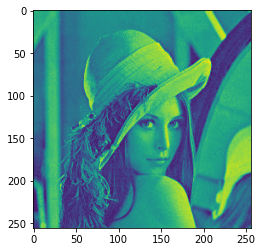

In [34]:
# 그레이 스케일(흑백처리)  cv.IMREAD_GRAYSCALE / cv.cvtColor()
import numpy as np

# im = cv.imread('myImg\\Lenna.png', cv.IMREAD_GRAYSCALE)
im = cv.imread('myImg\\Lenna.png')

print(type(im))
print(im.dtype)
print(im.shape)  # 행(높이), 열(폭), 색상(채널)

im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(im_gray.shape)
print(im_gray.dtype)

# cv.imwrite('myImg\\cv2\\Lenna_G.jpg', im_gray)
plt.imshow(im_gray)

<class 'numpy.ndarray'>
uint8
(256, 256, 3)
<class 'numpy.ndarray'>
float64
(256, 256)


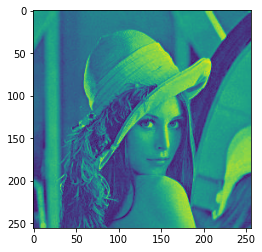

In [20]:
# https://en.wikipedia.org/wiki/YUV
# RGB 컬러 이미지를 흑백으로 변환하는 경우. 신호 Y 값을 산출
# BT.601  = RGB에서 Y값을 산출하는 공식
#   -> 사람 시각의 특성을 고려한 것으로 가장 밝게 느껴지는 0(녹색)의 계수가 커지는 것을 확인 한다.
# Y = 0.299*R + 0.587*G + 0.114*B

im = cv.imread('myImg\\Lenna.png')
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

print(type(im))
print(im.dtype)
print(im.shape)  # 행(높이), 열(폭), 색상(채널)

im_gray = 0.299*im[:,:,2] + 0.587*im[:,:,1] + 0.114*im[:,:,0]
print(type(im_gray))
print(im_gray.dtype)
print(im_gray.shape)
# cv.imwrite('myImg\\cv2\\Lenna_Y.jpg', im_gray)
plt.imshow(im_gray)

In [31]:
# imread()
im_gray_read = cv.imread('myImg\\Lenna.png', cv.IMREAD_GRAYSCALE) # os에 코덱에 따라 화소가 다르다
print(type(im_gray_read))
print(im_gray_read.shape)

im = cv.imread('myImg\\Lenna.png')
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY) # BT.601 공식을 작용
print(type(im_gray))
print(im_gray.shape)

# 판별
im_diff = im_gray.astype(int) - im_gray_read.astype(int)
print(im_diff)
print(im_diff.max())
print(im_diff.min())

<class 'numpy.ndarray'>
(256, 256)
<class 'numpy.ndarray'>
(256, 256)
[[1 1 1 ... 1 1 0]
 [1 0 1 ... 1 0 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]
1
0


In [ ]:
# 이미지 결합. 세로연결, 가로연결, 세로가로 바둑판 연결
# cv.vconcat()
# 1. 폭이 동일한 이미지를 세로로 연결
# 2. 같은 이미지를 반복 세로 연결
# 3. 폭이 서로 다른 이미지를 세로로 연결

# cv.hconcat()
# 1. 높이가 동일한 이미지를 가로로 연결
# 2. 같은 이미지를 반복 가로로 연결
# 3. 높이가 서로 다른 이미지를 가로로 연결

# np.file() : 같은 이미지를 반복정렬

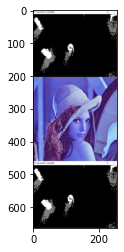

In [38]:
# cv.vconcat()
# 1. 같은 이미지를 세로로 연결
import cv2 as cv
import numpy as np

im1 = cv.imread('myImg\\shadow_people.jpg')
im2 = cv.imread('myImg\\Lenna.png')

# im_v = cv.vconcat([im1, im1])
# cv.imwrite('myImg\\cv2\\v_img.jpg', im_v)

# 함수 선언 resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
# 폭이 다른 이미지를 세로로 연결하겠다
# im.shape[0]는 높이, [1]는 폭
def my_resize(im_list, interpolation = cv.INTER_CUBIC):
    # 1.폭이 가장 작은 값을 리턴 받자
    w_min = min(im.shape[1] for im in im_list)
    
    # 2. 폭의 사이즈를 재조정
    im_list_resize = [cv.resize(im,(w_min, int(im.shape[0]*w_min/im.shape[1])),interpolation=interpolation) for im in im_list]
    
    return cv.vconcat(im_list_resize) # 결합해서 리턴

im_v = my_resize([im1, im2, im1])
# cv.imwrite('myImg\\cv2\\v_img_resize.jpg', im_v)

im_v02 = np.tile(im1,(2,1,1))
# cv.imwrite('myImg\\cv2\\v_img02.jpg', im_v02)

plt.imshow(im_v)

cv.hconcat()
 높이가 서로 다른 이미지를 가로로 연결

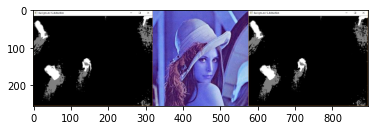

In [39]:
# cv.hconcat()
import cv2 as cv
import numpy as np

im1 = cv.imread('myImg\\shadow_people.jpg')
im2 = cv.imread('myImg\\Lenna.png')

# 함수 선언 resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
# 높이가 다른 이미지를 가로로 연결하겠다
# im.shape[0]는 높이, [1]는 폭
def my_resize(im_list, interpolation = cv.INTER_CUBIC):
    # 1.폭이 가장 작은 값을 리턴 받자
    h_min = min(im.shape[0] for im in im_list)
    
    # 2. 폭의 사이즈를 재조정
    im_list_resize = [cv.resize(im,(int(im.shape[1]*h_min/im.shape[0]),h_min),interpolation=interpolation) for im in im_list]
    
    return cv.hconcat(im_list_resize) # 결합해서 리턴

im_h = my_resize([im1, im2, im1])
# cv.imwrite('myImg\\cv2\\h_img_resize.jpg', im_h)

plt.imshow(im_h)

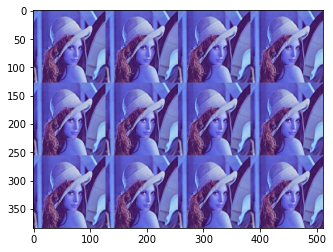

In [40]:
# 바둑판식 타일형을 만들어 보자
import cv2 as cv
import numpy as np

image = cv.imread('myImg\\Lenna.png')

def my_tile(im_list_2d):
    return cv.vconcat([cv.hconcat(im_list_h) for im_list_h in im_list_2d])

im01 = cv.resize(image, dsize=(0,0), fx=0.5, fy=0.5)

im_tile = my_tile([[im01, im01, im01, im01],
                 [im01, im01, im01, im01],
                 [im01, im01, im01, im01]])

# cv.imwrite('myImg\\cv2\\tile_img.jpg', im_tile)

plt.imshow(im_tile)

(256, 256, 3)


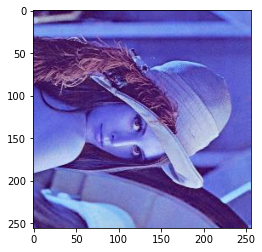

In [47]:
# 이미지회전 cv.rotate(ndarray, rotatecode), np.rot90()
# 상하 좌우 반전 cv.flip(), np.filp()
# flipcode = 0 :상하반전
# flipcode > 0 : 좌우반전
# flipcode < 0 : 상하 좌우 반전
import cv2 as cv
import numpy as np

image = cv.imread('myImg\\Lenna.png')
print(image.shape)

img_r_90 = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)
# cv.imwrite('myImg\\cv2\\Lenna_90.jpg', img_r_90)

plt.imshow(img_r_90)

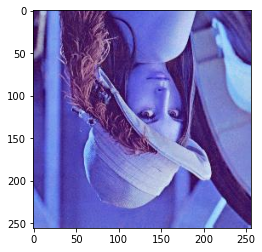

In [42]:
img_flip_up = cv.flip(image, 0)
# cv.imwrite('myImg\\cv2\\Lenna_up.jpg', img_flip_up)

plt.imshow(img_flip_up)

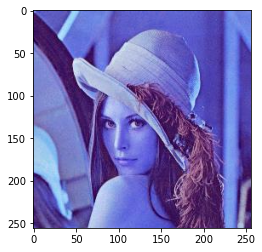

In [43]:
img_flip_lr = cv.flip(image, 1)
# cv.imwrite('myImg\\cv2\\Lenna_lr.jpg', img_flip_lr)

plt.imshow(img_flip_lr)

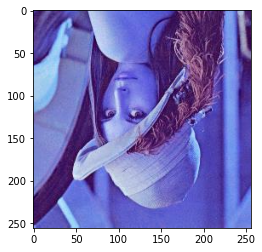

In [44]:
img_flip_up_lr = cv.flip(image, -1)
# cv.imwrite('myImg\\cv2\\Lenna_up_lr.jpg', img_flip_up_lr)

plt.imshow(img_flip_up_lr)